# Implementing Random Forest Classifier Model on Rain Prediction Dataset

In [350]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [351]:
#Reading the dataset
data=pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [352]:
#Checking the null values
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [353]:
#Checking duplicates
data.duplicated().sum()

0

In [354]:
# Convert Date to Year, Month, Day
data["Date"] = pd.to_datetime(data["Date"])
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data.drop(columns=["Date"], inplace=True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [355]:
# Compute correlation matrix
correlation_matrix = data.corr()
# Display correlation matrix
correlation_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743,0.039245,-0.204279,0.001507
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208,0.058388,-0.164622,-0.000495
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557,-0.009284,-0.030863,0.001134
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498,0.084141,-0.027912,-0.007770
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973,0.011678,0.023885,-0.001173
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923,-0.032708,0.060918,-0.009226
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404,-0.021620,0.051039,-0.009183
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240,-0.032806,0.061006,-0.009969
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417,0.010708,-0.090564,0.015610
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183,-0.009150,-0.018541,0.013207


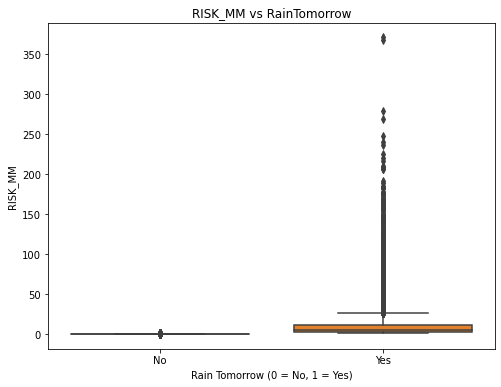

In [356]:
#Box Plot for checking the relation between RISK_MM and Target column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['RainTomorrow'], y=data['RISK_MM'])
plt.title("RISK_MM vs RainTomorrow")
plt.xlabel("Rain Tomorrow (0 = No, 1 = Yes)")
plt.ylabel("RISK_MM")
plt.show()

In [357]:
#Min Temp and Temp9am are having correlation above 0.9
#Max Temp and Temp3pm are having correlation above 0.9
#RISK_MM is directly related to RainTomorrow
# Drop columns 
columns_to_drop = ["Temp9am", "Temp3pm","RISK_MM"]
data.drop(columns=columns_to_drop, inplace=True)

In [358]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,No,No,2008,12,5


In [359]:
# Fill missing values for numerical columns with mean
num_cols = data.select_dtypes(include=["float64"]).columns
imputer = SimpleImputer(strategy="mean")
data[num_cols] = imputer.fit_transform(data[num_cols])

In [360]:
# Fill missing values for categorical columns with mode
cat_cols = data.select_dtypes(include=["object"]).columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [361]:
# Encode categorical variables
encoder = LabelEncoder()
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

In [362]:
# Compute correlation matrix
correlation_matrix = data.corr()
# Display correlation matrix
correlation_matrix

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
Location,1.000000,-0.006194,-0.020490,-0.003457,0.032114,0.002144,-0.005055,0.069269,-0.004434,0.008325,...,0.011066,0.036492,0.046345,-0.010908,-0.015860,-0.004911,-0.003579,0.022265,-0.008375,-0.000004
MinTemp,-0.006194,1.000000,0.733919,0.103314,0.353698,0.051907,-0.136321,0.173331,-0.029635,-0.158958,...,0.005913,-0.424357,-0.434034,0.061460,0.015902,0.055645,0.083717,0.039126,-0.203826,0.001504
MaxTemp,-0.020490,0.733919,1.000000,-0.074202,0.442214,0.331505,-0.212208,0.066329,-0.212589,-0.181344,...,-0.499725,-0.309093,-0.397422,-0.226776,-0.214469,-0.226474,-0.159087,0.058300,-0.164435,-0.000495
Rainfall,-0.003457,0.103314,-0.074202,1.000000,-0.038186,-0.173011,0.044853,0.127250,0.085142,0.047904,...,0.249609,-0.159676,-0.120366,0.171613,0.145848,0.500286,0.236874,-0.009242,-0.030710,0.001129
Evaporation,0.032114,0.353698,0.442214,-0.038186,1.000000,0.290375,-0.069170,0.147371,-0.064262,-0.044358,...,-0.289915,-0.211823,-0.231341,-0.152224,-0.147763,-0.141089,-0.089551,0.061925,-0.021086,-0.005875
Sunshine,0.002144,0.051907,0.331505,-0.173011,0.290375,1.000000,-0.064699,-0.022479,-0.070270,-0.033136,...,-0.446849,0.030932,-0.015477,-0.537714,-0.559379,-0.238980,-0.327029,0.008079,0.017322,-0.000848
WindGustDir,-0.005055,-0.136321,-0.212208,0.044853,-0.069170,-0.064699,1.000000,0.137648,0.356896,0.565814,...,0.063939,-0.120615,-0.031998,0.066094,0.058669,0.127651,0.053447,-0.021880,0.044115,-0.001470
WindGustSpeed,0.069269,0.173331,0.066329,0.127250,0.147371,-0.022479,0.137648,1.000000,0.074660,0.136660,...,-0.025822,-0.426600,-0.384642,0.052281,0.080202,0.148244,0.225264,-0.031422,0.058868,-0.008919
WindDir9am,-0.004434,-0.029635,-0.212589,0.085142,-0.064262,-0.070270,0.356896,0.074660,1.000000,0.301298,...,0.148903,-0.050318,0.039878,0.086578,0.054210,0.168410,0.035776,-0.001550,0.026215,-0.005781
WindDir3pm,0.008325,-0.158958,-0.181344,0.047904,-0.044358,-0.033136,0.565814,0.136660,0.301298,1.000000,...,-0.007186,-0.133629,-0.037495,0.047774,0.050714,0.123130,0.030488,-0.000677,0.035165,-0.000446


In [363]:
#Checking null values
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [364]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,...,22.0,1007.7,1007.1,8.000000,4.503167,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,...,25.0,1010.6,1007.8,4.437189,4.503167,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,...,30.0,1007.6,1008.7,4.437189,2.000000,0,0,2008,12,3
3,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,...,16.0,1017.6,1012.8,4.437189,4.503167,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,...,33.0,1010.8,1006.0,7.000000,8.000000,0,0,2008,12,5


In [365]:
# Define features and target variable
x = data.drop(columns=["RainTomorrow"])
y = data["RainTomorrow"]

In [366]:
# Split data into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [367]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=105, max_depth=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=105, random_state=42)

In [368]:
# Predict on test set
y_pred = model.predict(x_test)

In [369]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8466894053940012


In [370]:
#Printing Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22098
           1       0.76      0.45      0.57      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.71      0.74     28439
weighted avg       0.84      0.85      0.83     28439



In [371]:
# Predict on train set
y_pred2 = model.predict(x_train)

In [372]:
# Evaluate accuracy
accuracy = accuracy_score(y_train, y_pred2)
print(accuracy)

0.8660618527700125


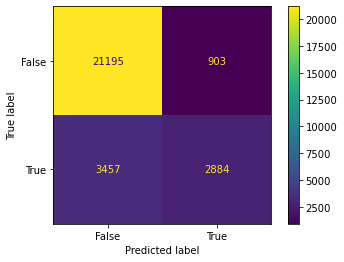

In [373]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()